# 1. Khai báo thư viện cần dùng

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Khởi tạo dữ liệu

In [7]:
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [8]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [12]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,36.941962,0.613978,9.862092,12.593990,21.240681
1,57.393646,19.996006,11.073383,7.201000,22.644499
2,31.335120,1.669029,8.379894,8.489949,26.752126
3,58.923640,19.030499,10.993878,29.436408,22.279517
4,52.865801,5.056539,10.269494,10.322613,20.825617


<AxesSubplot:ylabel='Density'>

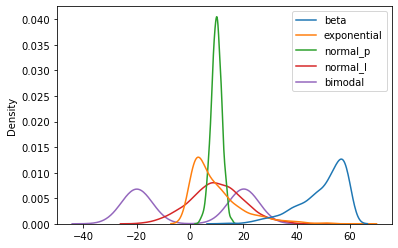

In [11]:
# Trực quan hóa dữ liệu sinh ra
sns.kdeplot(data=df)

In [14]:
# Hiển thị thống kê về dữ liệu sinh ra
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.930152,9.793821,9.951512,9.995794,0.099289
std,8.785218,9.487523,1.997714,9.921805,20.246876
min,13.015668,0.015986,3.409863,-18.597535,-28.912064
25%,45.132096,2.765473,8.681477,3.479516,-19.931212
50%,52.651221,6.871488,9.981255,9.664212,0.177803
75%,56.870273,13.521214,11.280104,16.320316,20.110377
max,59.957408,62.835541,15.978656,45.493097,27.951412


<AxesSubplot:ylabel='Density'>

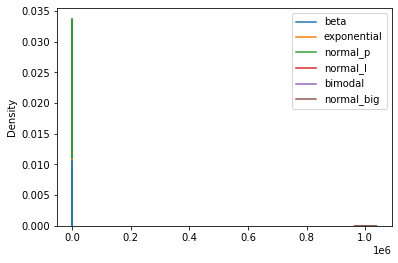

In [16]:
# Thêm một đặc trưng với giá trị lớn hơn nhiều
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

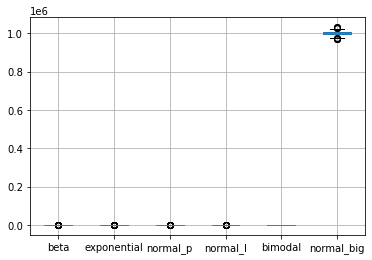

In [17]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [21]:
# Chuẩn hóa với StandardScaler (Z-Score scaling)
# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = s_scaler.fit_transform(df)
# lấy danh sáchc cột
col_names = list(df.columns)
# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-1.479154,-0.968054,-0.044784,0.261998,1.044703,0.660450
1,0.849976,1.075865,0.561858,-0.281823,1.114073,-1.592319
2,-2.117686,-0.856795,-0.787101,-0.151847,1.317051,0.888216
3,1.024219,0.974048,0.522041,1.960363,1.096037,-1.227003
4,0.334325,-0.499567,0.159253,0.032956,1.024193,0.441340


<AxesSubplot:ylabel='Density'>

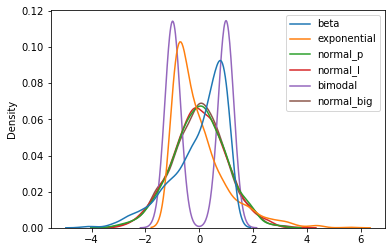

In [22]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

<AxesSubplot:>

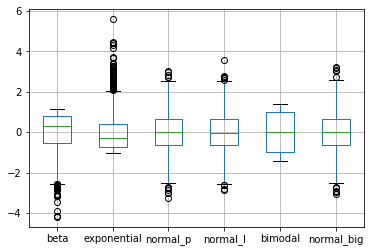

In [23]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()